# Numeric Representations of Words
- Now that we have a trained model with some semantic understanding of words, how should we use it? 

- If you look beneath the hood, the Word2Vec model trained in Part 2 consists of a feature vector for each word in the vocabulary, stored in a numpy array called "syn0":

In [35]:
import pandas as pd

# Read data from files 
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3 )

# Verify the number of reviews that were read (100,000 in total)
print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

(25000, 3)
(25000, 2)
(50000, 2)


In [2]:
# Load the model that we created in Part 2
from gensim.models import Word2Vec
model = Word2Vec.load("300features_40minwords_10context_trial1")





In [4]:
print(type(model.wv.syn0))
model.wv.syn0.shape


<class 'numpy.ndarray'>


/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


(16490, 300)

##### The number of rows in syn0 is the number of words in the model's vocabulary, and the number of columns corresponds to the size of the feature vector, which we set in Part 2.  

##### Setting the minimum word count to 40 gave us a total vocabulary of 16,492 words with 300 features apiece. Individual word vectors can be accessed in the following way:

In [5]:
model['flower']

/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-4.32998016e-02, -5.28234504e-02, -2.02760883e-02, -1.08321160e-02,
       -2.31839612e-01, -9.16971788e-02, -3.27804424e-02, -3.03268470e-02,
       -7.88544416e-02,  8.38424917e-03,  1.60038639e-02, -8.07637870e-02,
        1.40039161e-01,  4.73622233e-02, -3.89718637e-02,  6.25357777e-02,
       -5.82305975e-02, -9.31963883e-03, -5.71679026e-02,  2.45031081e-02,
        1.42761674e-02,  9.29287598e-02, -3.51962894e-02,  3.14797089e-02,
        2.64668800e-02, -1.44294333e-02,  1.43957417e-02, -3.58255813e-04,
        4.06841300e-02, -1.47867976e-02, -2.20860969e-02, -6.26565367e-02,
        1.15049649e-02, -1.95172317e-02, -9.38851852e-03, -7.16037154e-02,
       -3.30234431e-02,  2.23297104e-02,  5.98918572e-02, -3.95310447e-02,
        9.10618901e-03, -1.42172333e-02,  4.47525121e-02,  5.91831207e-02,
        1.29813597e-01, -1.05819665e-01,  7.09224343e-02,  8.97777546e-03,
       -7.44541287e-02,  8.57033506e-02,  2.58835256e-02,  9.77925491e-03,
        7.62244985e-02,  

In [7]:
model['king']

/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.07474418, -0.00429197, -0.03715971,  0.022473  ,  0.04023777,
        0.04119274,  0.06537425,  0.0678703 , -0.1213197 , -0.03993788,
        0.10365655,  0.08212607,  0.03499101, -0.0448495 ,  0.11467578,
       -0.09998709, -0.03012477, -0.02849822,  0.03968977, -0.00721788,
       -0.0254382 , -0.03338828, -0.0015711 ,  0.02304167, -0.04186383,
       -0.1192525 ,  0.03228801, -0.01520922, -0.0084264 ,  0.05555215,
        0.05559008, -0.04386429, -0.07615644, -0.11479031,  0.02023638,
        0.06086779, -0.10749281,  0.00453985,  0.00328771, -0.05576904,
       -0.01632066, -0.03685529,  0.02950063,  0.00811066,  0.09484436,
       -0.0757868 , -0.04011808, -0.13166086, -0.09175017, -0.02683333,
       -0.01979513,  0.02648794, -0.02820814,  0.03243322, -0.0510117 ,
       -0.00988178, -0.05177955,  0.01536439, -0.06496134,  0.0435563 ,
       -0.0727122 , -0.05148719,  0.08046361, -0.06326196, -0.03434853,
       -0.0526869 ,  0.06623079, -0.03301494, -0.06686661, -0.00

# Visualization of Word Vectors

In [8]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


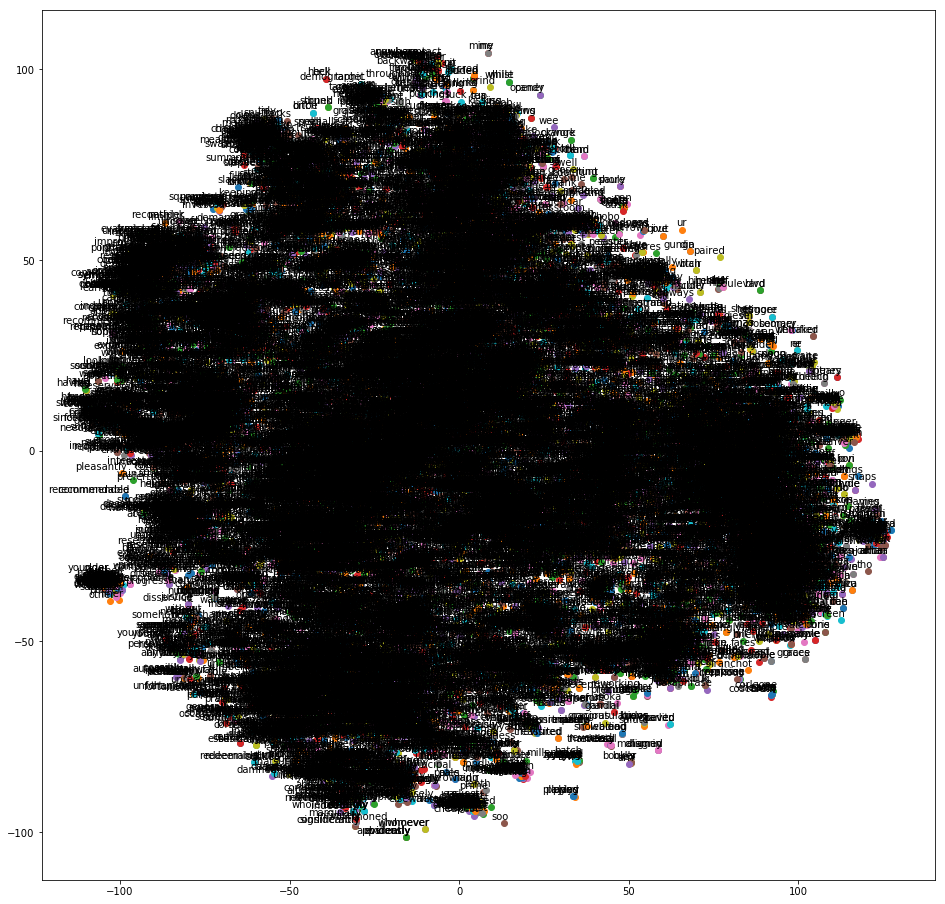

In [10]:
tsne_plot(model)

## Visualization of close words

In [13]:
import numpy as np

In [19]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


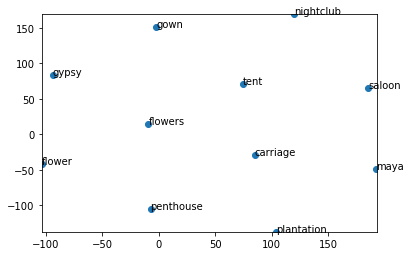

In [20]:
display_closestwords_tsnescatterplot(model, 'flower')

## From Words To Paragraphs, Attempt 1: Vector Averaging
- One challenge with the IMDB dataset is the variable-length reviews. 

- We need to find a way to take individual word vectors and transform them into a feature set that is the same length for every review.

- Since each word is a vector in 300-dimensional space, we can use vector operations to combine the words in each review. 

- One method we tried was to simply average the word vectors in a given review (for this purpose, we removed stop words, which would just add noise).

The following code averages the feature vectors, building on our code from Part 2. 

In [32]:
print(len(model.wv.index2word))

16490


In [33]:
model.wv.index2word

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'this',
 'that',
 's',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'you',
 't',
 'on',
 'not',
 'he',
 'are',
 'his',
 'have',
 'be',
 'one',
 'all',
 'at',
 'they',
 'by',
 'who',
 'an',
 'from',
 'so',
 'like',
 'there',
 'her',
 'or',
 'just',
 'about',
 'out',
 'has',
 'if',
 'what',
 'some',
 'good',
 'can',
 'more',
 'when',
 'very',
 'she',
 'up',
 'no',
 'time',
 'even',
 'would',
 'my',
 'which',
 'their',
 'story',
 'only',
 'really',
 'see',
 'had',
 'were',
 'well',
 'we',
 'me',
 'than',
 'much',
 'bad',
 'get',
 'been',
 'people',
 'also',
 'into',
 'do',
 'great',
 'other',
 'will',
 'first',
 'because',
 'him',
 'how',
 'most',
 'don',
 'them',
 'made',
 'its',
 'make',
 'then',
 'way',
 'could',
 'too',
 'movies',
 'after',
 'any',
 'characters',
 'character',
 'think',
 'films',
 'two',
 'watch',
 'being',
 'many',
 'plot',
 'seen',
 'never',
 'where',
 'love',
 'life',
 'little',
 'acting

In [37]:
# Import various modules for string cleaning

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist(review, remove_stopwords=False):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
      
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    
    # 5. Return a list of words
    return(words)


# """"""""""""""
# # What this does?
# # 1. 
# # 2. 
# # 3. 
# # 4. 
# """"""""""""""


In [41]:
def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given paragraph
    
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    
    # Initialize a counter
    counter = 0.
    
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
     
    # Loop through the reviews
    for review in reviews:
       
       # Print a status message every 1000th review
        if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
       
       # Call the function (defined above) that makes average feature vectors
            reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)

       # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs    

In [42]:
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.
num_features = 300
clean_train_reviews = []

for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

print("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review,remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

/Users/keonpark/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/keonpark/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


Review 0 of 25000


/Users/keonpark/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices